In [1]:
"""Create parameters.py and load it"""

# Directory for .inp file:
path = 'D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp'

# import libraries:
import importlib   # For reloading your own files
from termcolor import colored   # for colored error messages
# my own files:
try:
    import inp_data_extractor as inp
except:
    try:
        import Bubble_dynamics_simulation.inp_data_extractor as inp
    except:
        print(colored(f'Error, \'inp_data_extractor.py\' not found', 'red'))
importlib.reload(inp)   # reload changes you made
inp.extract(path)

import parameters as par   # numeric constants and coefficents
importlib.reload(par)   # reload changes you made
print(par.model)

path=D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp
Note, lambda value for specie 'H' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH2' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N' is not in data.py: 0.0 is used
Note, lambda value for specie 'NNH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H4' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H3' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H2' is not in data.py: 0.0 is used
Note, lambda value for specie 'H2NN' is not in data.py: 0.0 is used
Warning, third body 'H2O' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
Warning, third body 'AR' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
model: chem_Otomo2018_without_O
File 'parameters.py' succesfully created
chem_O

In [2]:
"""Libraries"""

# for plotting:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import numpy as np   # matrices, math
import os    # file management
import pandas as pd   # data frames
import importlib   # for reloading your own files
from termcolor import colored   # for colored error messages

# my own file:
already_imported = 'de' in globals()
try:
    import full_bubble_model as de
except:
    try:
        import Bubble_dynamics_simulation.full_bubble_model as de
    except:
        print(colored(f'Error, \'full_bubble_model.py\' not found', 'red'))
if already_imported: importlib.reload(de)   # reload changes you made

model: chem_Otomo2018_without_O
target specie: NH3
excitation: sin_impulse (control parameters: ['p_A', 'freq', 'n'])
enable heat transfer: True	enable evaporation: False	enable reactions: True	enable dissipated energy: True


In [4]:
"""Base settings"""

# r-string will not convert \n to new line
directory = r'D:\parameter_studies\2D_bruteforce\10000_Hz'
file_base_name = 'output_'

In [5]:
"""Load all CSV files from directory into a dataframe (all_data)"""

# create a dataframe
all_data = pd.DataFrame()
num = 0
print(f'Found files:')

# iterate trough all files in directory (including subdirectories)
for (root, dirs, files) in os.walk(directory):
    for file in files:
        # ignore python rubish
        if 'ipynb_checkpoints' in root:
            continue
        # check if it's a CSV starting with file_base_name
        if file[-4:] != '.csv':
            continue
        if file[:len(file_base_name)] != file_base_name:
            continue

        # read file
        num += 1
        current_data = pd.read_csv(os.path.join(root, file))

        # Cast object-dtype columns with all-bool values to bool dtype
        for col in current_data.columns:
            if current_data[col].dtype == 'object' and all(current_data[col].dropna().map(lambda x: isinstance(x, bool))):
                current_data[col] = current_data[col].astype(bool)

        print(f'\t{file: <24} ({current_data.shape[0]: >4} rows)')
        all_data = pd.concat([all_data, current_data])
    
    
# Print some stats:
print(f'_______________________________________')
print(f'total number of files: {num}')
total = all_data.shape[0]
print(f'{"total:": <10} {total: < 8} rows   ( 100.00 %)')

# Print errors
def matches(error, error_code):
    errors, success = de.get_errors(error_code)
    return error in errors

for error in de.error_codes.keys():
    digit = -1; place = -1
    for i in range(10):
        if str(i) in error:
            digit = i
            place = len(error) - error.find(str(i)) - 1

    if digit < 0 and place < 0:
        print(colored(f'Error: invalid error code: {error}', 'red'))
        continue
    num = all_data.loc[(all_data['error_code'] // (10**place) % 10) == digit].shape[0]
    if error == 'x0x':
        num  -= all_data.loc[(all_data['error_code'] % 10) == 0].shape[0] # xx0
    print(f'{error + ":": <10} {num: < 8} rows   ({(100*num/total): 7.2f} %)\t' + colored(de.error_codes[error]['describtion'], de.error_codes[error]['color']))



#for error_code in range(7):
#    num = all_data.loc[(all_data['error_code'] == error_code)].shape[0]
#    print(f'error code {error_code}: {num} rows   ({(100*num/total):.2f} %)')
#num = all_data.loc[(all_data['T_max'] > 6000.0)].shape[0]
#print(f'too hot: {num} rows    ({100*num/total:.2f} %)')
print(f'_______________________________________')

Found files:
	output_1.csv             (5001 rows)
	output_2.csv             (5001 rows)
	output_3.csv             (1248 rows)
_______________________________________
total number of files: 3
total:      11250   rows   ( 100.00 %)
xx0:        10076   rows   (  89.56 %)	succecfully solved with LSODA solver
xx1:        95      rows   (   0.84 %)	LSODA solver didn't converge
xx2:        1060    rows   (   9.42 %)	LSODA solver timed out
xx3:        19      rows   (   0.17 %)	LSODA solver had a fatal error
x0x:        444     rows   (   3.95 %)	succecfully solved with Radau solver
x4x:        504     rows   (   4.48 %)	Radau solver didn't converge (NO SOLUTION!)
x5x:        226     rows   (   2.01 %)	Radau solver timed out (NO SOLUTION!)
x6x:        0       rows   (   0.00 %)	Radau solver had a fatal error (NO SOLUTION!)
1xx:        0       rows   (   0.00 %)	Low pressure error: The pressure of the gas is negative
2xx:        0       rows   (   0.00 %)	Low pressure warning: The pressure dur

In [6]:
"""Locate valid (good_data) and wrong (wrong_data) simulations"""

# Get valid datas (or use all_data['success'] == True)
good_data = all_data.loc[
    (all_data['error_code'] % 100 <= 3) & ((all_data['error_code'] // 100) % 10 != 1) &
    (all_data['energy_efficiency'] > 0.0) & (all_data['energy_efficiency'] == all_data['energy_efficiency']) # positive not NaN
    # or set negative energy to inf: good_data.loc[good_data['energy'] < 0.0, 'energy'] = 1e10
]

# Everything that's not in good_data
wrong_data = pd.concat([good_data, all_data]).drop_duplicates(keep=False)

# Sort by energy
good_data = good_data.sort_values(['energy_efficiency'], ascending=True)

# New column
good_data['logE'] = np.log10(good_data['energy_efficiency'])
print(f'Good data: {good_data.shape[0]} rows ({100*good_data.shape[0]/all_data.shape[0]: .2f} %)')

Good data: 10520 rows ( 93.51 %)


In [7]:
"""Let's see the dataframe"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'elapsed_time', 'steps', f'n_{de.target_specie}', 'energy_efficiency'] + de.excitation_args]

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,elapsed_time,steps,n_NH3,energy_efficiency,p_A,freq,n
3774,3779,0.000101,1.0,101325.0,0.35,293.15,2338.339978,0.001018,2.636412,13283,1.492501e-12,8.610762e+02,-182432.432432,10000.0,1.0
3697,3704,0.000099,1.0,101325.0,0.35,293.15,2338.339978,0.001018,2.616989,13116,1.482051e-12,8.614300e+02,-182432.432432,10000.0,1.0
3549,3553,0.000095,1.0,101325.0,0.35,293.15,2338.339978,0.001018,2.628892,13256,1.307011e-12,8.625686e+02,-177702.702703,10000.0,1.0
3927,3930,0.000105,1.0,101325.0,0.35,293.15,2338.339978,0.001018,2.767519,13618,1.678866e-12,8.643784e+02,-187162.162162,10000.0,1.0
3478,3478,0.000093,1.0,101325.0,0.35,293.15,2338.339978,0.001018,2.834501,13824,1.293312e-12,8.671487e+02,-177702.702703,10000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,17,0.000001,1.0,101325.0,0.35,293.15,2338.339978,0.001018,1.736890,6313,3.909151e-144,2.561878e+124,-125675.675676,10000.0,1.0
12,18,0.000001,1.0,101325.0,0.35,293.15,2338.339978,0.001018,1.531834,6247,2.153696e-144,6.104850e+124,-130405.405405,10000.0,1.0
17,19,0.000001,1.0,101325.0,0.35,293.15,2338.339978,0.001018,1.820232,6484,1.822800e-144,1.010842e+125,-135135.135135,10000.0,1.0
16,20,0.000001,1.0,101325.0,0.35,293.15,2338.339978,0.001018,1.702873,6537,2.030903e-144,1.474810e+125,-139864.864865,10000.0,1.0


In [8]:
"""Print some statistics"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'elapsed_time', 'steps', f'n_{de.target_specie}', 'energy_efficiency'] + de.excitation_args].describe()

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,elapsed_time,steps,n_NH3,energy_efficiency,p_A,freq,n
count,10520.000000,10520.000000,10520.0,10520.0,10520.00,10520.00,1.052000e+04,1.052000e+04,10520.000000,10520.000000,1.052000e+04,1.052000e+04,10520.000000,10520.0,10520.0
mean,5952.229087,0.000159,1.0,101325.0,0.35,293.15,2.338340e+03,1.017649e-03,5.081023,16108.086027,1.224813e-12,8.519346e+121,-219982.530059,10000.0,1.0
std,3093.730680,0.000083,0.0,0.0,0.00,0.00,4.547690e-13,2.168507e-19,9.274221,5527.067544,2.240328e-12,5.230492e+123,102730.272678,0.0,0.0
min,1.000000,0.000001,1.0,101325.0,0.35,293.15,2.338340e+03,1.017649e-03,0.445286,2907.000000,-5.939374e-23,8.610762e+02,-400000.000000,10000.0,1.0
25%,3333.750000,0.000089,1.0,101325.0,0.35,293.15,2.338340e+03,1.017649e-03,2.569500,12939.000000,1.036113e-25,4.017674e+03,-310135.135135,10000.0,1.0
50%,5990.500000,0.000160,1.0,101325.0,0.35,293.15,2.338340e+03,1.017649e-03,3.522836,16639.000000,6.757002e-14,6.935324e+04,-215540.540541,10000.0,1.0
75%,8620.250000,0.000230,1.0,101325.0,0.35,293.15,2.338340e+03,1.017649e-03,4.233471,19822.250000,1.358941e-12,1.595385e+16,-130405.405405,10000.0,1.0
max,11250.000000,0.000300,1.0,101325.0,0.35,293.15,2.338340e+03,1.017649e-03,135.799376,99052.000000,1.188249e-11,5.009219e+125,-50000.000000,10000.0,1.0


succecfully solved with LSODA solver


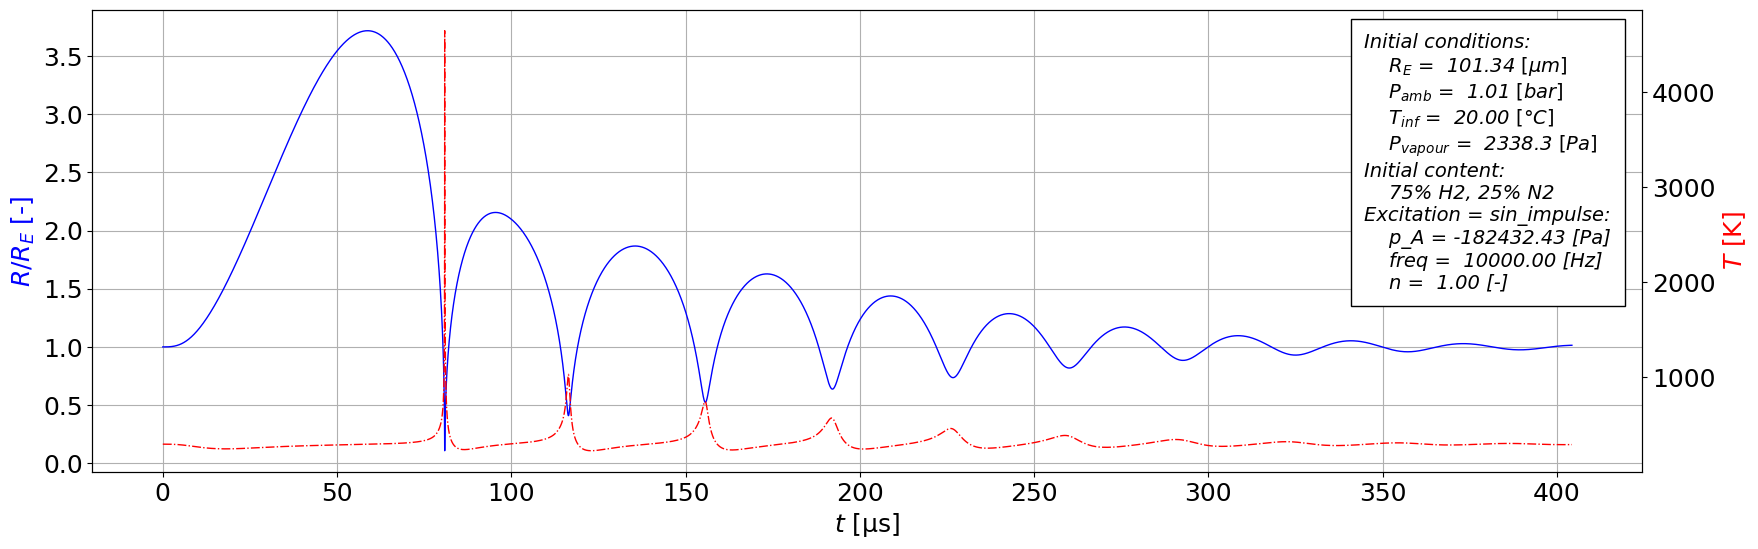

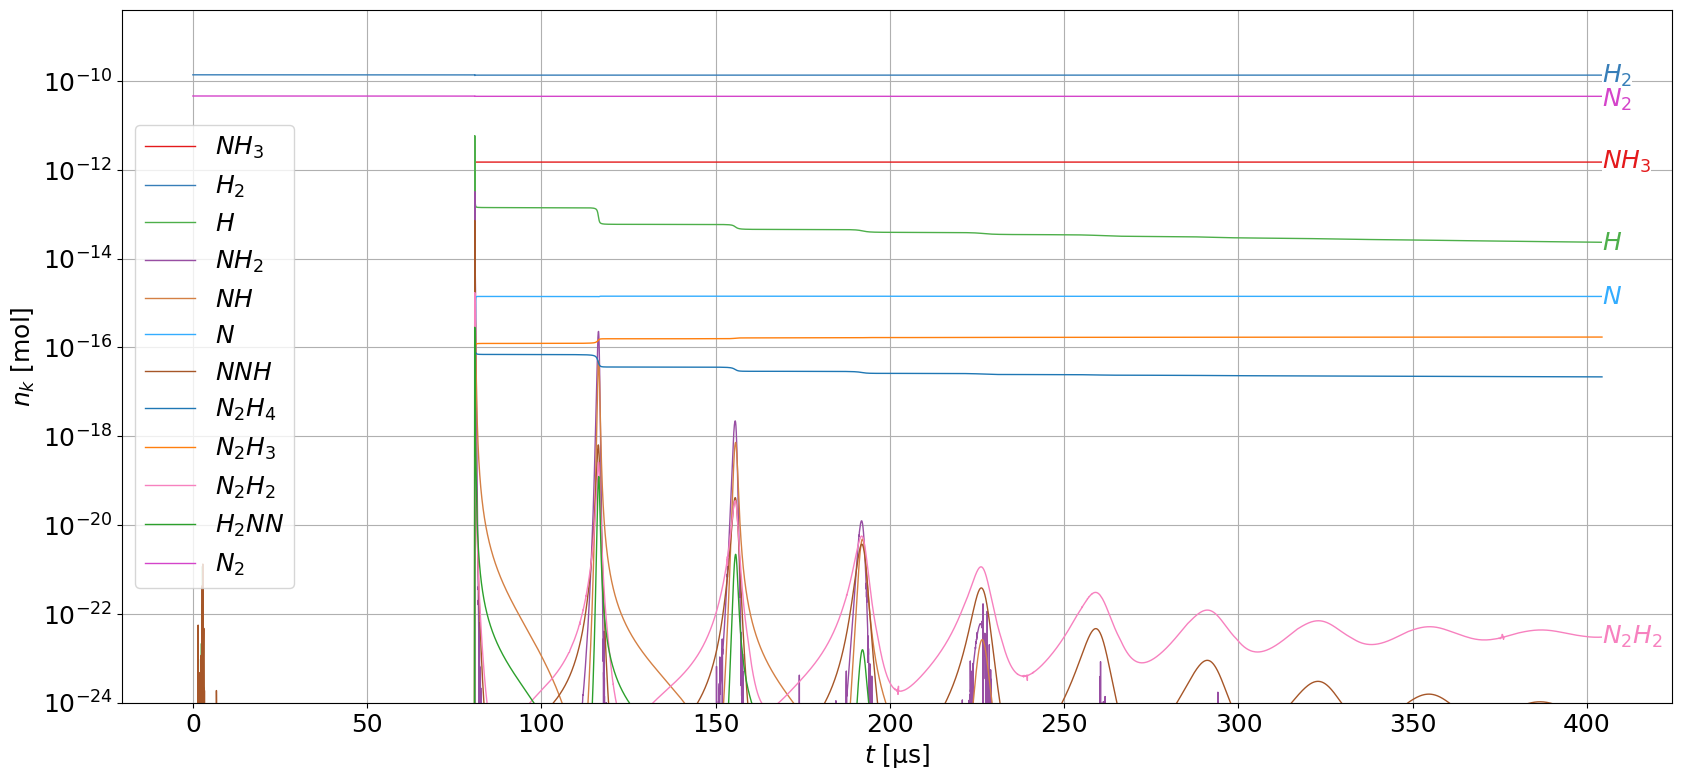

Control parameters:
    ID = 3779,                                   # ID of control parameter (not used during calculation)
  # Initial conditions:
    R_E =  0.00010134,                           # bubble equilibrium radius [m]
    ratio =  1.00,                               # initial radius / equilibrium radius R_0/R_E [-]
    gases = [par.index['H2'], par.index['N2']],  # indexes of species in initial bubble (list of species indexes)
    fractions = [0.75, 0.25],                    # molar fractions of species in initial bubble (list of fractions for every gas)
  # Ambient parameters:
    P_amb =  101325.00,                          # ambient pressure [Pa]
    T_inf =  293.15,                             # ambient temperature [K]
  # Liquid parameters:
    alfa_M =  0.3500,                            # water accommodation coefficient [-]
    P_v =  2338.34,                              # vapour pressure [Pa]
    mu_L =  0.0010,                              # dynamic viscosity [Pa*

In [9]:
"""Plot a certain simulation"""

# converts a line of all_data to a dictionary containing the control parameters (cpar)
def line_to_dict(line):
    # check 'full_bubble_model.py' settings
    if (de.enable_heat_transfer != line['enable_heat_transfer'] or
        de.enable_evaporation != line['enable_evaporation'] or
        de.enable_reactions != line['enable_reactions'] or
        de.enable_dissipated_energy != line['enable_dissipated_energy'] or
        de.target_specie != line['target_specie'] or
        de.excitation_type != line['excitation_type']):
        print(colored(f'Error: the settings of \'full_bubble_model.py\' do not match the current settings', 'red'))

    gases = str(line['gases'])
    gases = [int(index) for index in gases.split(' ') if index != '']
    fractions = str(line['fractions'])
    fractions = [float(frac) for frac in fractions.split(' ') if frac != '']

    cpar = de.dotdict(dict(
        ID = line['ID'],                  # ID of control parameter (not used during calculation)
    # Initial conditions:
        R_E = line['R_E'],                # bubble equilibrium radius [m]
        ratio = line['ratio'],            # initial radius / equilibrium radius R_0/R_E [-]
        gases = gases,                    # indexes of species in initial bubble (list of species indexes)
        fractions = fractions,            # molar fractions of species in initial bubble (list of fractions for every gas)
    # Ambient parameters:
        P_amb = line['P_amb'],            # ambient pressure [Pa]
        T_inf = line['T_inf'],            # ambient temperature [K]
    # Liquid parameters:
        alfa_M = line['alfa_M'],          # water accommodation coefficient [-]
        P_v = line['P_v'],                # vapour pressure [Pa]
        mu_L = line['mu_L'],              # dynamic viscosity [Pa*s]
        c_L = line['c_L'],                # sound speed [m/s]
        surfactant = line['surfactant'],  # surfactant (surface tension modfier) [-]
    ))

    # Excitation parameters:
    for arg in de.excitation_args:
        cpar[arg] = line[arg]

    return cpar

cpar = line_to_dict(good_data.iloc[0])   # choose the most energy efficient one
de.plot(cpar, plot_pressure=False, show_legend=True)